In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing, model_selection
import pandas as pd
import seaborn as sns
import keras

In [2]:
# importin the dataset
data=pd.read_csv('bb.csv')

In [3]:
data.head(3)
# dataset does not have the column names


,00994,1620,1620.1,19.73,19.73.1,1,10.00,0.99,1603.80,5,92,0
0,1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
1,2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
2,2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0


In [4]:
# first column is the costumer ID so we drop it
data=data.drop(columns=['00994'])

In [5]:
l1=[]
l2=[]
data2=pd.DataFrame()
for i in range(len(data.columns)):
    l1.append('a{}'.format(i))
    l2.append(list(data.iloc[:,i]))
    data2[l1[i]]=l2[i]

data2.head(3)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
1,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
2,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0


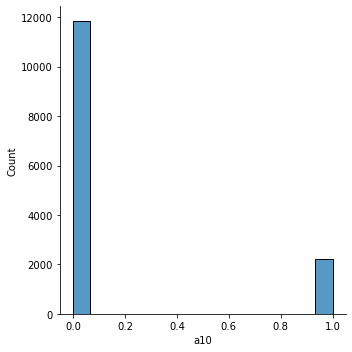

In [6]:
# column a10 is the target feature for binary classification
sns.displot(data2['a10'])

In [7]:
# How many times we should copy the class 1 to make a balance data set??
portion=(len(data2['a10'])-data2['a10'].sum())/data2['a10'].sum()
print(portion)

5.2954850245865


In [8]:
# making a dataset with only_class_1
data3=data2[data2['a10']>0]
data3.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
6,648.0,648,5.33,5.33,0,8.91,0.0,0.0,0,0,1
10,2160.0,2160,5.33,5.33,0,8.91,0.0,0.0,0,0,1
14,594.0,1188,29.33,58.67,0,10.00,0.0,0.0,0,0,1
21,1188.0,4752,6.00,23.99,0,10.00,0.0,0.0,0,176,1
23,1404.0,2808,27.99,55.99,0,8.91,0.0,0.0,0,0,1


In [9]:
#Concatinating the main dataset with several only_class_1 dataset to make balance dataset
concat_list=[data2]
for i in range(int(portion-1)):
    concat_list.append(data3)
rest=portion-int(portion)
concat_list.append(data3.iloc[:int(rest*len(data3['a10'])),:])
data4=pd.concat(concat_list)
data4.head(3)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
1,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
2,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0


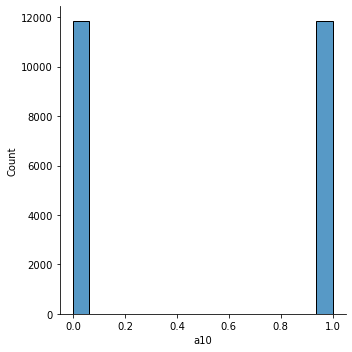

In [10]:
sns.displot(data4['a10'])
#now we have a balance dataset

In [23]:
# Standardization (Scaling)
scaler = preprocessing.StandardScaler()
scaled_data = scaler.fit_transform(data4.drop(columns=['a10'])) 
df_scaled = pd.DataFrame(scaled_data, columns=data4.drop(columns=['a10']).columns,index=data4.index)
df_scaled.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9
0,1.207984,0.374191,-0.356535,-0.474452,-0.444175,-0.009526,-0.381210,-0.375104,-0.177073,-0.759715
1,1.207984,0.374191,-0.356535,-0.474452,-0.444175,-0.009526,-0.381210,-0.375104,-0.177073,3.394123
2,0.123924,-0.244819,-0.235850,-0.382852,-0.444175,-0.009526,1.763352,1.887209,1.948159,0.621329
3,1.207984,0.374191,-0.356535,-0.474452,-0.444175,-0.009526,0.742132,1.204924,-0.177073,3.105068
4,1.207984,0.374191,-0.494460,-0.579139,-0.444175,-0.009526,-0.381210,-0.375104,-0.177073,-0.759715


In [34]:
# Shuffeling the dataset
df_shuffled=pd.concat([df_scaled,data4['a10']],axis=1)
df_shuffled=df_shuffled.sample(frac=0.2)

In [35]:
df_shuffled.head(3)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10
4383,-0.743325,-0.740027,-0.050035,-0.241816,-0.444175,-0.009526,-0.38121,-0.375104,-0.177073,-0.759715,1
11432,-1.610573,-0.368621,-0.040456,0.781786,-0.444175,-0.009526,-0.38121,-0.375104,-0.177073,-0.481365,1
7498,1.207984,0.374191,-0.356535,-0.474452,-0.444175,-0.009526,-0.38121,-0.375104,-0.177073,-0.759715,0


In [40]:
x=df_shuffled.drop(columns=['a10'])
y=df_shuffled['a10']

In [41]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.1,shuffle=False)

In [42]:
x_train.to_numpy().shape

(4264, 10)

In [43]:
model=keras.Sequential()
model.add(keras.Input(shape=10)) 
model.add(keras.layers.Dense(50,activation='relu'))   
model.add(keras.layers.Dense(50,activation='relu'))  
model.add(keras.layers.Dense(2,activation='softmax'))  


In [44]:
opt=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 102       
Total params: 3,202
Trainable params: 3,202
Non-trainable params: 0
_________________________________________________________________


In [47]:
early_stop=keras.callbacks.EarlyStopping(patience=2)

In [49]:
model.fit(x_train,y_train,batch_size=100, verbose=2,callbacks=[early_stop],
          validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
43/43 - 0s - loss: 0.3417 - accuracy: 0.8276 - val_loss: 0.3817 - val_accuracy: 0.8186
Epoch 2/100
43/43 - 0s - loss: 0.3414 - accuracy: 0.8283 - val_loss: 0.3802 - val_accuracy: 0.8207
Epoch 3/100
43/43 - 0s - loss: 0.3412 - accuracy: 0.8258 - val_loss: 0.3807 - val_accuracy: 0.8207
Epoch 4/100
43/43 - 0s - loss: 0.3411 - accuracy: 0.8290 - val_loss: 0.3797 - val_accuracy: 0.8186
Epoch 5/100
43/43 - 0s - loss: 0.3411 - accuracy: 0.8283 - val_loss: 0.3815 - val_accuracy: 0.8207
Epoch 6/100
43/43 - 0s - loss: 0.3406 - accuracy: 0.8295 - val_loss: 0.3796 - val_accuracy: 0.8186
Epoch 7/100
43/43 - 0s - loss: 0.3403 - accuracy: 0.8286 - val_loss: 0.3801 - val_accuracy: 0.8207
Epoch 8/100
43/43 - 0s - loss: 0.3403 - accuracy: 0.8279 - val_loss: 0.3802 - val_accuracy: 0.8186


In [50]:
test=model.evaluate(x_test,y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8186


In [51]:
print(test)

[0.3801616430282593, 0.8185654282569885]
